In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('/content/amazon_uk_shoes_products_dataset_2021_12 (1).csv')

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df.dropna(subset=['review_text'], inplace=True)
df['review_text'] = df['review_text'].astype(str)



In [ ]:
non_string_values = df['review_text'].apply(lambda x: type(x) != str)
print(df[non_string_values])


Empty DataFrame
Columns: [url, product_name, reviewer_name, review_title, review_text, review_rating, verified_purchase, review_date, helpful_count, uniq_id]
Index: []


In [ ]:
print(df)

                                        url  \
0    https://www.amazon.co.uk/dp/B07SBX32T5   
1    https://www.amazon.co.uk/dp/B07SBX32T5   
2    https://www.amazon.co.uk/dp/B07SBX32T5   
3    https://www.amazon.co.uk/dp/B07SBX32T5   
4    https://www.amazon.co.uk/dp/B08SW434MG   
..                                      ...   
994  https://www.amazon.co.uk/dp/B08WCPS1HR   
995  https://www.amazon.co.uk/dp/B07TRJ622L   
996  https://www.amazon.co.uk/dp/B08WCPS1HR   
997  https://www.amazon.co.uk/dp/B07TRJ622L   
998  https://www.amazon.co.uk/dp/B07TRJ622L   

                                          product_name     reviewer_name  \
0    Klasified Women's Transparent Clear Sneaker Sh...  Jocelyn McSayles   
1    Klasified Women's Transparent Clear Sneaker Sh...      Kenia Rivera   
2    Klasified Women's Transparent Clear Sneaker Sh...       Chris Souza   
3    Klasified Women's Transparent Clear Sneaker Sh...   Amazon Customer   
4    GUESS Women's Bradly Gymnastics Shoe, White, 7 UK 

In [ ]:
df['Sentiment Score'] = df['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [ ]:
df['Sentiment'] = df['Sentiment Score'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


In [ ]:
print(df[['review_text', 'Sentiment Score', 'Sentiment']])

                                           review_text  Sentiment Score  \
0    Love these. Was looking for converses and thes...           0.8517   
1    The shoes are very cute, but after the 2nd day...           0.6593   
2                                         Good quality           0.4404   
3                                                Great           0.6249   
4    Ho scelto il modello bianco con rifinitura die...          -0.4588   
..                                                 ...              ...   
994  Schuhe wurden schnell geliefert. Leider waren ...          -0.5994   
995  Everyone has Birkenstocks and I wanted somethi...           0.9729   
996  Great shoes! The quality is high! But Produkt ...           0.5744   
997  Didn’t like them as much at first. Gave me bad...           0.8748   
998  I bought these as a gift and the person I got ...           0.9273   

    Sentiment  
0    Positive  
1    Positive  
2    Positive  
3    Positive  
4    Negative  
.. 

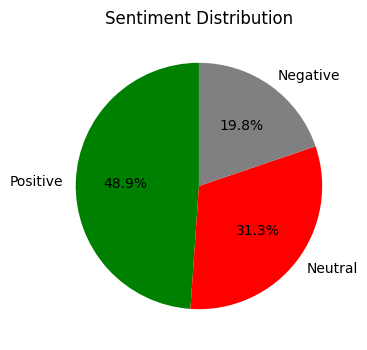

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
print(sentiment_counts)

Positive    487
Neutral     312
Negative    197
Name: Sentiment, dtype: int64


In [ ]:
positive_reviews = df[df['Sentiment'] == 'Positive']
if not positive_reviews.empty:
    print("URLs for Positive Reviews:")
    print(positive_reviews['url'])

URLs for Positive Reviews:
0      https://www.amazon.co.uk/dp/B07SBX32T5
1      https://www.amazon.co.uk/dp/B07SBX32T5
2      https://www.amazon.co.uk/dp/B07SBX32T5
3      https://www.amazon.co.uk/dp/B07SBX32T5
9      https://www.amazon.co.uk/dp/B08SW434MG
                        ...                  
993    https://www.amazon.co.uk/dp/B07NKJTKBP
995    https://www.amazon.co.uk/dp/B07TRJ622L
996    https://www.amazon.co.uk/dp/B08WCPS1HR
997    https://www.amazon.co.uk/dp/B07TRJ622L
998    https://www.amazon.co.uk/dp/B07TRJ622L
Name: url, Length: 487, dtype: object


In [ ]:
df['review_text'] = df['review_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['review_text']).toarray()
y = df.iloc[:, 1].values

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: 0.798333")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1 score: {f1:}")

Accuracy: 0.798333
Precision: 0.07354497354497354
Recall: 0.09116809116809117
F1 score: 0.0648205545641443


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
